## Basic data analysis

### Import merged data 

In [233]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [234]:
input_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\merged_food_insecurity_2010_2022.csv" 

In [235]:
all_data = pd.read_csv(input_file)

In [236]:
all_data.head(10)

high_threshold_in_state  per_fi_less_or_equal_to_low_threshold  \
0                     1.85                                  0.327   
1                     1.85                                  0.385   
2                     1.85                                  0.423   
3                     1.85                                  0.461   
4                     1.85                                  0.451   
5                     1.85                                  0.472   
6                     1.85                                  0.467   
7                     1.85                                  0.485   
8                     1.85                                  0.486   
9                     1.85                                  0.476   

      county_name  food_insecurity_rate  \
0  autauga county                 0.134   
1  autauga county                 0.136   
2  autauga county                 0.135   
3  autauga county                 0.139   
4  autauga county                 0.144   
5  autauga county                 0.139   
6  autauga county                 0.134   
7  autauga county                 0.132   
8  autauga county                 0.157   
9  autauga county                 0.145   

   per_fi_children_hh_income_above_185_fpl  fips low_threshold_type  \
0                                     0.49  1001               snap   
1                                     0.37  1001               snap   
2                                     0.37  1001               snap   
3                                     0.31  1001               snap   
4                                     0.28  1001               snap   
5                                     0.27  1001               snap   
6                                     0.29  1001               snap   
7                                     0.34  1001               snap   
8                                     0.31  1001               snap   
9                                     0.29  1001               snap   

   num_of_food_insecure_persons  cost_per_meal  child_food_insecurity_rate  \
0                        7140.0       2.580000                       0.203   
1                        7310.0       2.820000                       0.196   
2                        7360.0       2.986678                       0.205   
3                        7620.0       3.060000                       0.215   
4                        7930.0       3.160000                       0.224   
5                        7680.0       3.180000                       0.210   
6                        7360.0       3.140000                       0.199   
7                        7270.0       3.190000                       0.198   
8                        8670.0       3.000000                       0.196   
9                        8070.0       3.220000                       0.181   

   num_of_food_insecure_children      high_threshold_type  \
0                         2980.0  other nutrition program   
1                         2890.0  other nutrition program   
2                         3010.0  other nutrition program   
3                         3090.0  other nutrition program   
4                         3190.0  other nutrition program   
5                         2950.0  other nutrition program   
6                         2760.0  other nutrition program   
7                         2670.0  other nutrition program   
8                         2590.0  other nutrition program   
9                         2380.0  other nutrition program   

   per_fi_children_hh_income_below_185_fpl state_name_raw  \
0                                     0.51        alabama   
1                                     0.63        alabama   
2                                     0.63        alabama   
3                                     0.69        alabama   
4                                     0.72        alabama   
5                                     0.73        alabama   
6                            

In [237]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40853 entries, 0 to 40852
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   high_threshold_in_state                  40853 non-null  float64
 1   per_fi_less_or_equal_to_low_threshold    40853 non-null  float64
 2   county_name                              40853 non-null  object 
 3   food_insecurity_rate                     40853 non-null  float64
 4   per_fi_children_hh_income_above_185_fpl  40843 non-null  float64
 5   fips                                     40853 non-null  int64  
 6   low_threshold_type                       40853 non-null  object 
 7   num_of_food_insecure_persons             40853 non-null  float64
 8   cost_per_meal                            40853 non-null  float64
 9   child_food_insecurity_rate               40846 non-null  float64
 10  num_of_food_insecure_children            40848

In [238]:
#Check to see if all years are present 
all_data['year'].value_counts().sort_index()

year
2010    3143
2011    3143
2012    3143
2013    3143
2014    3142
2015    3142
2016    3142
2017    3142
2018    3141
2019    3142
2020    3143
2021    3143
2022    3144
Name: count, dtype: int64

In [239]:
#Check if fips are 5 
all_data['fips'].apply(lambda x: len(str(x))).value_counts()

fips
5    36742
4     4111
Name: count, dtype: int64

In [240]:
#check if more than one row for the same county and the same year - ideally 1 
all_data.groupby(['fips', 'year']).size().max()

1

In [241]:
all_data.describe()

high_threshold_in_state  per_fi_less_or_equal_to_low_threshold  \
count             40853.000000                           40853.000000   
mean                  1.871391                               0.604828   
std                   0.052452                               0.141877   
min                   1.850000                               0.000000   
25%                   1.850000                               0.508000   
50%                   1.850000                               0.601000   
75%                   1.850000                               0.697000   
max                   2.000000                               1.000000   

       food_insecurity_rate  per_fi_children_hh_income_above_185_fpl  \
count          40853.000000                             40843.000000   
mean               0.138813                                 0.270266   
std                0.040850                                 0.134660   
min                0.022000                                 0.000000   
25%                0.111000                                 0.180000   
50%                0.136000                                 0.266000   
75%                0.162000                                 0.350000   
max                0.379000                                 1.000000   

               fips  num_of_food_insecure_persons  cost_per_meal  \
count  40853.000000                  4.085300e+04   40853.000000   
mean   30383.866595                  1.330034e+04       3.044443   
std    15161.997004                  4.404018e+04       0.497871   
min     1001.000000                  1.000000e+01       0.000000   
25%    18177.000000                  1.530000e+03       2.710000   
50%    29177.000000                  3.690000e+03       2.950000   
75%    45081.000000                  9.240000e+03       3.260000   
max    56045.000000                  1.749600e+06      10.610000   

       child_food_insecurity_rate  num_of_food_insecure_children  \
count                40846.000000                   40848.000000   
mean                     0.202987                    4436.530307   
std                      0.059575                   15575.768480   
min                      0.000000                       0.000000   
25%                      0.163000                     490.000000   
50%                      0.202000                    1190.000000   
75%                      0.243000                    3030.000000   
max                      0.489000                  650480.000000   

       per_fi_children_hh_income_below_185_fpl  low_threshold_in_state  \
count                             40843.000000            40853.000000   
mean                                  0.730328                1.560872   
std                                   0.135023                0.296628   
min                                   0.000000                1.300000   
25%                                   0.650000                1.300000   
50%                                   0.740000                1.300000   
75%                                   0.820000                2.000000   
max                                   1.000000                2.000000   

       weighted_annual_shortfall  per_fi_btwn_thresholds  \
count               4.085300e+04            23490.000000   
mean                7.253743e+06                0.139018   
std                 2.463351e+07                0.085255   
min                 0.000000e+00                0.000000   
25%                 7.830000e+05                0.074000   
50%                 1.883000e+06                0.143000   
75%                 4.836000e+06                0.196000   
max                 1.059086e+09                0.773000   

       per_fi_greater_high_threshold          year  
count                   40853.000000  40853.000000  
mean                        0.315239   2016.000024  
std                         0.138590      3.742020  
min                         0.000000   2010.000000  
2

In [242]:
#Check missing values 
missing_sum = pd.DataFrame({
    'Variable': all_data.columns,
    'Missing_count': all_data.isnull().sum(),
    'Missing_per': (all_data.isnull().sum() / len(all_data) * 100).round(2)
})

In [243]:
missing_sum

Variable  \
high_threshold_in_state                                  high_threshold_in_state   
per_fi_less_or_equal_to_low_threshold      per_fi_less_or_equal_to_low_threshold   
county_name                                                          county_name   
food_insecurity_rate                                        food_insecurity_rate   
per_fi_children_hh_income_above_185_fpl  per_fi_children_hh_income_above_185_fpl   
fips                                                                        fips   
low_threshold_type                                            low_threshold_type   
num_of_food_insecure_persons                        num_of_food_insecure_persons   
cost_per_meal                                                      cost_per_meal   
child_food_insecurity_rate                            child_food_insecurity_rate   
num_of_food_insecure_children                      num_of_food_insecure_children   
high_threshold_type                                          high_threshold_type   
per_fi_children_hh_income_below_185_fpl  per_fi_children_hh_income_below_185_fpl   
state_name_raw                                                    state_name_raw   
low_threshold_in_state                                    low_threshold_in_state   
state_name                                                            state_name   
weighted_annual_shortfall                              weighted_annual_shortfall   
per_fi_btwn_thresholds                                    per_fi_btwn_thresholds   
per_fi_greater_high_threshold                      per_fi_greater_high_threshold   
year                                                                        year   

                                         Missing_count  Missing_per  
high_threshold_in_state                              0         0.00  
per_fi_less_or_equal_to_low_threshold                0         0.00  
county_name                                          0         0.00  
food_insecurity_rate                                 0         0.00  
per_fi_children_hh_income_above_185_fpl             10         0.02  
fips                                                 0         0.00  
low_threshold_type                                   0         0.00  
num_of_food_insecure_persons                         0         0.00  
cost_per_meal                                        0         0.00  
child_food_insecurity_rate                           7         0.02  
num_of_food_insecure_children                        5         0.01  
high_threshold_type                                  0         0.00  
per_fi_children_hh_income_below_185_fpl             10         0.02  
state_name_raw                                       0         0.00  
low_threshold_in_state                               0         0.00  
state_name                                           0         0.00  
weighted_annual_shortfall                            0         0.00  
per_fi_btwn_thresholds                           17363        42.50  
per_fi_greater_high_threshold                        0         0.00  
year                                                 0         0.00

In [244]:
all_data[all_data['per_fi_children_hh_income_below_185_fpl'].isnull()]

high_threshold_in_state  per_fi_less_or_equal_to_low_threshold  \
5786                      1.85                                  0.244   
6436                      1.85                                  0.238   
7130                      2.00                                  0.300   
7139                      1.85                                  0.796   
23193                     1.85                                  0.499   
32787                     1.85                                  0.243   
34755                     1.85                                  0.635   
37350                     1.85                                  0.448   
38042                     1.85                                  0.332   
38043                     1.85                                  0.240   

             county_name  food_insecurity_rate  \
5786      forsyth county                 0.063   
6436       oconee county                 0.064   
7130      kalawao county                 0.216   
7139      kalawao county                 0.153   
23193   hunterdon county                 0.046   
32787  williamson county                 0.055   
34755      loving county                 0.178   
37350     loudoun county                 0.041   
38042  falls church city                 0.046   
38043  falls church city                 0.056   

       per_fi_children_hh_income_above_185_fpl   fips  \
5786                                       NaN  13117   
6436                                       NaN  13219   
7130                                       NaN  15005   
7139                                       NaN  15005   
23193                                      NaN  34019   
32787                                      NaN  47187   
34755                                      NaN  48301   
37350                                      NaN  51107   
38042                                      NaN  51610   
38043                                      NaN  51610   

                   low_threshold_type  num_of_food_insecure_persons  \
5786                             snap                       15410.0   
6436                             snap                        2610.0   
7130   snap, other nutrition programs                          20.0   
7139                             snap                          10.0   
23193                            snap                        5910.0   
32787                            snap                       13320.0   
34755                            snap                          20.0   
37350                            snap                       16800.0   
38042                            snap                         660.0   
38043                            snap                         810.0   

       cost_per_meal  child_food_insecurity_rate  \
5786            4.15                       0.000   
6436            3.92                       0.000   
7130            3.10                         NaN   
7139            5.98                       0.253   
23193           4.08                       0.000   
32787           4.51                       0.000   
34755           2.93                         NaN   
37350           4.44                       0.000   
38042           4.23                       0.000   
38043           4.61                       0.000   

       num_of_food_insecure_children             high_threshold_type  \
5786                             0.0         other nutrition program   
6436                             0.0         other nutrition program   
7130                             0.0  snap, other nutrition programs   
7139                             0.0         other nutrition program   
23193                            0.0         other nutrition program   
32787                            0.0         other nutrition program   
34755                            0.0         other nutrition program   
37350                            0.0         other nutrition program   
38042                

Ignore? 

### National trends

<Axes: xlabel='year'>

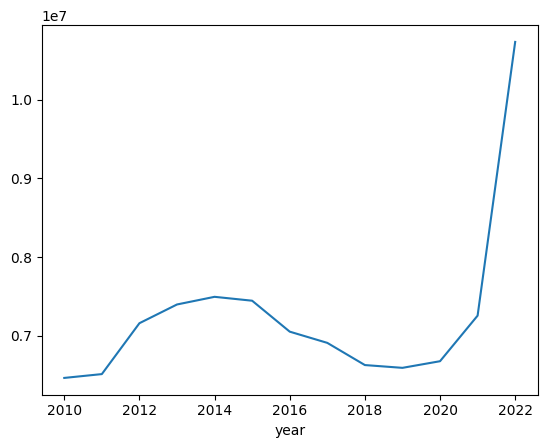

In [245]:
all_data.groupby('year')["weighted_annual_shortfall"].mean().plot()

<Axes: xlabel='year'>

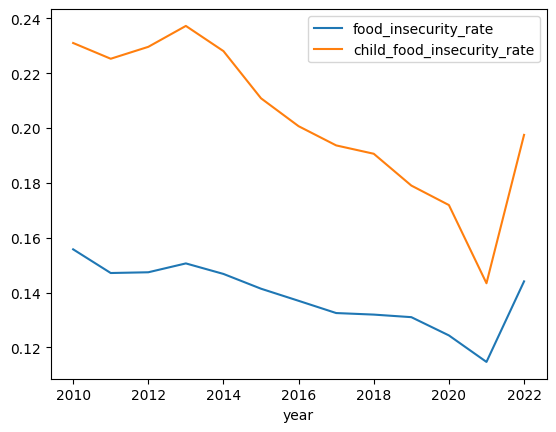

In [246]:
all_data.groupby('year')[["food_insecurity_rate", "child_food_insecurity_rate"]].mean().plot()

<Axes: xlabel='year'>

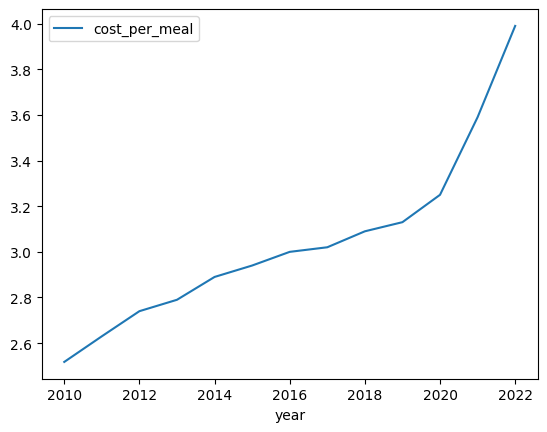

In [247]:
all_data.groupby('year')[["cost_per_meal"]].mean().plot()

### County trends

In [248]:
# Calculate population 
# Estimated population = number of food insecure / FI rate
all_data['estimated_population'] = (
    all_data['num_of_food_insecure_persons'] / 
    (all_data['food_insecurity_rate'] / 100)
)

In [249]:
all_data['estimated_population'].describe()

count    4.085300e+04
mean     1.012471e+07
std      3.237022e+07
min      4.761905e+03
25%      1.098837e+06
50%      2.575949e+06
75%      6.731579e+06
max      1.014027e+09
Name: estimated_population, dtype: float64

In [250]:
#Calculate shortfall per capita 
all_data['shortfall_per_capita'] = (
    all_data['weighted_annual_shortfall'] / 
    (all_data['estimated_population'] / 100)
)

In [251]:
all_data['shortfall_per_capita'].describe()

count    40853.000000
mean        72.520728
std         23.010845
min          0.000000
25%         56.949556
50%         69.301775
75%         84.375258
max        245.789573
Name: shortfall_per_capita, dtype: float64

### Load the PLACES data

In [252]:
places_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\places_2022_data.csv" 

In [253]:
places_data = pd.read_csv(places_file)

In [254]:
places_data.describe()

countyfips  diagnosed diabetes among adults  obesity among adults
count   3145.000000                      3145.000000           3145.000000
mean   30358.549762                        11.131669             37.906264
std    15177.640372                         2.307522              4.647134
min       59.000000                         6.000000             17.700000
25%    18173.000000                         9.400000             35.300000
50%    29173.000000                        10.800000             38.400000
75%    45079.000000                        12.500000             41.000000
max    56045.000000                        21.500000             53.000000

In [255]:
places_data.dtypes

countyfips                           int64
diagnosed diabetes among adults    float64
obesity among adults               float64
dtype: object

In [256]:
def clean_places_data(places_data): 
    #rename columns 
    rename_map ={'countyfips': 'fips',
        'diagnosed diabetes among adults': 'diabetes_prevalence',
        'obesity among adults': 'obesity_prevalence'
    }
    places_data.rename(columns=rename_map, inplace=True, errors='ignore')

    #standardize fips code 
    places_data['fips'] = (
        places_data['fips']
        .astype(str)
        .str.zfill(5)
    )
    # ensure prevalence columns are numeric 
    places_data['diabetes_prevalence'] = pd.to_numeric(places_data['diabetes_prevalence'], errors='coerce')
    places_data['obesity_prevalence'] = pd.to_numeric(places_data['obesity_prevalence'], errors='coerce')
    
    # normalize percentages 
    places_data['diabetes_prevalence'] = places_data['diabetes_prevalence'] / 100.0
    places_data['obesity_prevalence'] = places_data['obesity_prevalence'] / 100.0

    return places_data

In [257]:
places_data_cleaned = clean_places_data(places_data)

In [258]:
places_data_cleaned.head()

fips  diabetes_prevalence  obesity_prevalence
0  01001                0.113               0.384
1  01003                0.102               0.368
2  01005                0.160               0.438
3  01007                0.133               0.414
4  01009                0.116               0.373

### Descriptive analysis 
+ Correlation 

In [259]:
county_avg = all_data.groupby('fips').agg({
    'state_name': 'first',
    'county_name': 'first',
    'weighted_annual_shortfall': 'mean',
    'food_insecurity_rate': 'mean',
    'cost_per_meal': 'mean',
    'shortfall_per_capita': 'mean',
    'num_of_food_insecure_persons': 'mean',
    'child_food_insecurity_rate': 'mean',
    'per_fi_less_or_equal_to_low_threshold': 'mean',
    'per_fi_greater_high_threshold': 'mean',
    'estimated_population': 'mean'
}).reset_index()
county_avg['fips'] = county_avg['fips'].astype(str).str.zfill(5)

In [260]:
county_avg.columns = [
    'fips',
    'state_name',
    'county_name',
    'shortfall_avg_2010_2022',
    'food_insecurity_rate_avg_2010_2022',
    'cost_per_meal_avg_2010_2022',
    'shortfall_per_capita_avg_2010_2022',
    'num_food_insecure_avg_2010_2022',
    'child_fi_rate_avg_2010_2022',
    'per_less_low_threshold_fi_avg_2010_2022',
    'per_above_hight_threshold_fi_avg_2010_2022',
    'population_avg_2010_2018'
]

In [261]:
county_avg

fips state_name        county_name  shortfall_avg_2010_2022  \
0     01001         al     autauga county             4.289209e+06   
1     01003         al     baldwin county             1.607862e+07   
2     01005         al     barbour county             3.052385e+06   
3     01007         al        bibb county             1.894395e+06   
4     01009         al      blount county             3.901295e+06   
...     ...        ...                ...                      ...   
3151  56037         wy  sweetwater county             2.773425e+06   
3152  56039         wy       teton county             1.780897e+06   
3153  56041         wy       uinta county             1.338271e+06   
3154  56043         wy    washakie county             5.271192e+05   
3155  56045         wy      weston county             4.752292e+05   

      food_insecurity_rate_avg_2010_2022  cost_per_meal_avg_2010_2022  \
0                               0.139917                     3.162223   
1                               0.130538                     3.479203   
2                               0.216923                     3.095625   
3                               0.159615                     3.013433   
4                               0.128308                     2.997825   
...                                  ...                          ...   
3151                            0.113692                     3.191988   
3152                            0.106923                     4.328624   
3153                            0.124615                     2.988919   
3154                            0.116615                     3.180282   
3155                            0.123462                     3.129474   

      shortfall_per_capita_avg_2010_2022  num_food_insecure_avg_2010_2022  \
0                              77.117362                      7753.333333   
1                              78.953495                     26247.692308   
2                             115.660750                      5741.538462   
3                              83.837650                      3608.461538   
4                              67.466397                      7409.230769   
...                                  ...                              ...   
3151                           63.587859                      4963.076923   
3152                           79.541845                      2382.307692   
3153                           64.670490                      2580.000000   
3154                           64.479092                       956.923077   
3155                           67.178900                       874.615385   

      child_fi_rate_avg_2010_2022  per_less_low_threshold_fi_avg_2010_2022  \
0                        0.195583                                 0.446333   
1                        0.190385                                 0.436385   
2                        0.298154                                 0.571154   
3                        0.235000                                 0.500538   
4                        0.204154                                 0.533154   
...                           ...                                      ...   
3151                     0.168154                                 0.394846   
3152                     0.137231                                 0.328538   
3153                     0.174231                                 0.469769   
3154                     0.163692                                 0.461077   
3155                     0.180692                                 0.424308   

      per_above_hight_threshold_fi_avg_2010_2022  population_avg_2010_2018  
0                                       0.431833              5.538911e+06  
1                                       0.436154              2.011643e+07  
2                                       0.300462              2.639780e+06  
3                                       0.336769              2.261172e+06  
4                                       0.

In [262]:
county_avg.dtypes

fips                                           object
state_name                                     object
county_name                                    object
shortfall_avg_2010_2022                       float64
food_insecurity_rate_avg_2010_2022            float64
cost_per_meal_avg_2010_2022                   float64
shortfall_per_capita_avg_2010_2022            float64
num_food_insecure_avg_2010_2022               float64
child_fi_rate_avg_2010_2022                   float64
per_less_low_threshold_fi_avg_2010_2022       float64
per_above_hight_threshold_fi_avg_2010_2022    float64
population_avg_2010_2018                      float64
dtype: object

In [263]:
### Merge the aggregated county data from MMG to PLACES data
county_avg_places = county_avg.merge(
    places_data_cleaned, 
    on='fips', 
    how='inner'
)

In [298]:
out_dir =  r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data viz"
out_file = "county_avg_places_final_data.csv"
full_path = os.path.join(out_dir,out_file)

In [299]:
county_avg_places.to_csv(full_path, index=False)

In [264]:
county_avg_places.head()

fips state_name     county_name  shortfall_avg_2010_2022  \
0  01001         al  autauga county             4.289209e+06   
1  01003         al  baldwin county             1.607862e+07   
2  01005         al  barbour county             3.052385e+06   
3  01007         al     bibb county             1.894395e+06   
4  01009         al   blount county             3.901295e+06   

   food_insecurity_rate_avg_2010_2022  cost_per_meal_avg_2010_2022  \
0                            0.139917                     3.162223   
1                            0.130538                     3.479203   
2                            0.216923                     3.095625   
3                            0.159615                     3.013433   
4                            0.128308                     2.997825   

   shortfall_per_capita_avg_2010_2022  num_food_insecure_avg_2010_2022  \
0                           77.117362                      7753.333333   
1                           78.953495                     26247.692308   
2                          115.660750                      5741.538462   
3                           83.837650                      3608.461538   
4                           67.466397                      7409.230769   

   child_fi_rate_avg_2010_2022  per_less_low_threshold_fi_avg_2010_2022  \
0                     0.195583                                 0.446333   
1                     0.190385                                 0.436385   
2                     0.298154                                 0.571154   
3                     0.235000                                 0.500538   
4                     0.204154                                 0.533154   

   per_above_hight_threshold_fi_avg_2010_2022  population_avg_2010_2018  \
0                                    0.431833              5.538911e+06   
1                                    0.436154              2.011643e+07   
2                                    0.300462              2.639780e+06   
3                                    0.336769              2.261172e+06   
4                                    0.331308              5.768646e+06   

   diabetes_prevalence  obesity_prevalence  
0                0.113               0.384  
1                0.102               0.368  
2                0.160               0.438  
3                0.133               0.414  
4                0.116               0.373

In [265]:
county_avg_places.describe()

shortfall_avg_2010_2022  food_insecurity_rate_avg_2010_2022  \
count             3.144000e+03                         3144.000000   
mean              7.298295e+06                            0.138837   
std               2.438224e+07                            0.036336   
min               8.653077e+03                            0.045692   
25%               8.071994e+05                            0.114288   
50%               1.930024e+06                            0.136231   
75%               4.873603e+06                            0.160692   
max               7.599476e+08                            0.314077   

       cost_per_meal_avg_2010_2022  shortfall_per_capita_avg_2010_2022  \
count                  3144.000000                         3144.000000   
mean                      3.048538                           72.658096   
std                       0.296512                           18.842165   
min                       2.212190                           25.525774   
25%                       2.870985                           59.835182   
50%                       3.002751                           71.131074   
75%                       3.152523                           83.605315   
max                       5.888073                          209.121080   

       num_food_insecure_avg_2010_2022  child_fi_rate_avg_2010_2022  \
count                     3.144000e+03                  3144.000000   
mean                      1.330847e+04                     0.202953   
std                       4.353635e+04                     0.048263   
min                       1.615385e+01                     0.065385   
25%                       1.565192e+03                     0.169981   
50%                       3.727692e+03                     0.201231   
75%                       9.277692e+03                     0.235154   
max                       1.329729e+06                     0.396769   

       per_less_low_threshold_fi_avg_2010_2022  \
count                              3144.000000   
mean                                  0.604884   
std                                   0.122954   
min                                   0.243846   
25%                                   0.521212   
50%                                   0.603462   
75%                                   0.684346   
max                                   0.980692   

       per_above_hight_threshold_fi_avg_2010_2022  population_avg_2010_2018  \
count                                 3144.000000              3.144000e+03   
mean                                     0.315289              1.012093e+07   
std                                      0.107384              3.232212e+07   
min                                      0.002846              8.896194e+03   
25%                                      0.244231              1.096456e+06   
50%                                      0.311923              2.575454e+06   
75%                                      0.382500              6.736683e+06   
max                                      0.710692              9.966066e+08   

       diabetes_prevalence  obesity_prevalence  
count          3144.000000         3144.000000  
mean              0.111319            0.379077  
std               0.023079            0.046472  
min               0.060000            0.177000  
25%               0.094000            0.353000  
50%               0.108000            0.384000  
75%               0.125250            0.410000  
max               0.215000            0.530000

In [266]:
county_avg_places.columns

Index(['fips', 'state_name', 'county_name', 'shortfall_avg_2010_2022',
       'food_insecurity_rate_avg_2010_2022', 'cost_per_meal_avg_2010_2022',
       'shortfall_per_capita_avg_2010_2022', 'num_food_insecure_avg_2010_2022',
       'child_fi_rate_avg_2010_2022',
       'per_less_low_threshold_fi_avg_2010_2022',
       'per_above_hight_threshold_fi_avg_2010_2022',
       'population_avg_2010_2018', 'diabetes_prevalence',
       'obesity_prevalence'],
      dtype='object')

In [267]:
### Variables for correlation
corr_vars = [
    'shortfall_per_capita_avg_2010_2022',
    'food_insecurity_rate_avg_2010_2022',
    'cost_per_meal_avg_2010_2022',
    'child_fi_rate_avg_2010_2022',
    'diabetes_prevalence', 
    'obesity_prevalence'
]

In [268]:
corr_matrix = county_avg_places[corr_vars].corr()

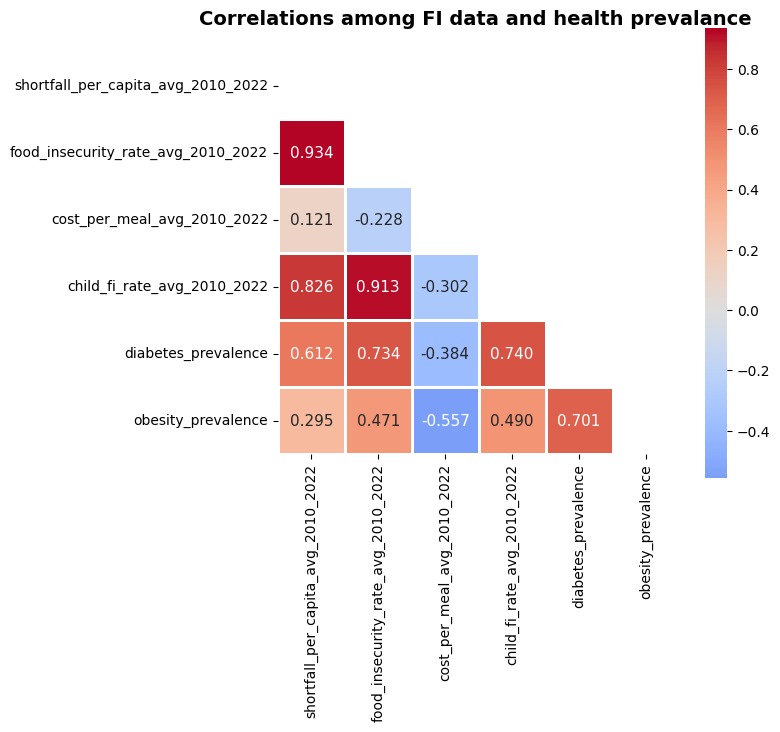

In [269]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0)

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among FI data and health prevalance ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

**Observations:**
1. Food insecurity variables
+ "food insecurity rate" and "shortfall_per_capita" have a strong correlation - 0.93
+ "child food insecurity rate" and "food insecurity rate" - 0.91
+ Counties with higher food insecurity also have higher food budget shortfalls and higher child food insecurity.
  
2. Health outcomes correlate strongly with food insecurity
+ Diabetes prevalence:
    + 0.73 with food insecurity
    + 0.61 with shortfall
    + 0.74 with child FI rate

+ Obesity prevalence:
    + 0.47 with food insecurity
    + 0.30 with shortfall
    + 0.49 with child FI
    + 0.70 with diabetes
+ Food insecurity is more predictive for diabetes prevalence than obesity prevalence.

3. Cost per meal have negative correlation both with FI and Health outcomes
+ High cost-of-living counties have higher income, better access to healthcare so overall better population health
+ We should not consider "cost per meal" as "affordability" but more like a signal for socioeconomic state of that county. 

### Explanatory analysis

#### Load the census data

In [270]:
census_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\census_data.csv" 

In [271]:
census_data = pd.read_csv(census_file)

In [272]:
census_data.head()

fips              county_name  estimate_total_households  \
0  1001  Autauga County, Alabama                      22308   
1  1003  Baldwin County, Alabama                      90802   
2  1005  Barbour County, Alabama                       9016   
3  1007     Bibb County, Alabama                       7216   
4  1009   Blount County, Alabama                      21626   

  median_household_income  percent_families_wo_employment  per_hs_grad  \
0                   68315                            17.9         90.4   
1                   71039                            20.3         91.6   
2                   39712                            26.2         76.5   
3                   50669                            22.5         78.9   
4                   57440                            20.1         81.8   

   per_col_grad _merge  
0          29.6   both  
1          32.6   both  
2          11.9   both  
3          10.9   both  
4          14.7   both

In [273]:
# Standardize the median_household_income column
## Covert string to numeric 
census_data['median_household_income'] = pd.to_numeric(census_data['median_household_income'], errors='coerce'
) 
## Apply z-score distribution 
median_inc_mean = census_data['median_household_income'].mean()
median_inc_sigma = census_data['median_household_income'].std()
## Add new variable to census data 
census_data['median_inc_standardized'] = (census_data['median_household_income'] - median_inc_mean)/ median_inc_sigma

In [274]:
census_data.columns

Index(['fips', 'county_name', 'estimate_total_households',
       'median_household_income', 'percent_families_wo_employment',
       'per_hs_grad', 'per_col_grad', '_merge', 'median_inc_standardized'],
      dtype='object')

In [275]:
census_data.dtypes

fips                                int64
county_name                        object
estimate_total_households           int64
median_household_income           float64
percent_families_wo_employment    float64
per_hs_grad                       float64
per_col_grad                      float64
_merge                             object
median_inc_standardized           float64
dtype: object

In [276]:
## Add new variables for age and race 
census_additional_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\all_merged_new.csv"
census_additional_data = pd.read_csv(census_additional_file)
census_additional_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11240\4125805992.py:3: DtypeWarning:

Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.



high_threshold_in_state  per_fi_less_or_equal_to_low_threshold  \
0                     1.85                                  0.327   
1                     1.85                                  0.385   
2                     1.85                                  0.423   
3                     1.85                                  0.461   
4                     1.85                                  0.451   

    county_name_x  food_insecurity_rate  \
0  autauga county                 0.134   
1  autauga county                 0.136   
2  autauga county                 0.135   
3  autauga county                 0.139   
4  autauga county                 0.144   

   per_fi_children_hh_income_above_185_fpl  fips low_threshold_type  \
0                                     0.49  1001               snap   
1                                     0.37  1001               snap   
2                                     0.37  1001               snap   
3                                     0.31  1001               snap   
4                                     0.28  1001               snap   

   num_of_food_insecure_persons  cost_per_meal  child_food_insecurity_rate  \
0                        7140.0       2.580000                       0.203   
1                        7310.0       2.820000                       0.196   
2                        7360.0       2.986678                       0.205   
3                        7620.0       3.060000                       0.215   
4                        7930.0       3.160000                       0.224   

   ...  diabetes_rate obesity_rate            county_name_y  \
0  ...          0.113        0.384  Autauga County, Alabama   
1  ...          0.113        0.384  Autauga County, Alabama   
2  ...          0.113        0.384  Autauga County, Alabama   
3  ...          0.113        0.384  Autauga County, Alabama   
4  ...          0.113        0.384  Autauga County, Alabama   

  estimate_total_households  median_household_income  \
0                     22308                    68315   
1                     22308                    68315   
2                     22308                    68315   
3                     22308                    68315   
4                     22308                    68315   

  percent_families_wo_employment  per_hs_grad  per_col_grad  \
0                           17.9         90.4          29.6   
1                           17.9         90.4          29.6   
2                           17.9         90.4          29.6   
3                           17.9         90.4          29.6   
4                           17.9         90.4          29.6   

   percent_white_only  percent_over65  
0                74.4            15.6  
1                74.4            15.6  
2                74.4            15.6  
3                74.4            15.6  
4                74.4            15.6  

[5 rows x 30 columns]

In [278]:
census_data['fips']= census_data['fips'].astype(str).str.zfill(5)
census_additional_data['fips']= census_additional_data['fips'].astype(str).str.zfill(5)
census_additional_data_2 = census_additional_data.drop_duplicates(subset='fips')
all_census = census_data.merge(census_additional_data_2[['fips','percent_white_only','percent_over65']], on="fips", how="left")
#all_census = census_data.merge(census_additional_data['percent_white_only','percent_over65'], on="fips", how="left")

In [279]:
all_census.head(15)

fips               county_name  estimate_total_households  \
0   01001   Autauga County, Alabama                      22308   
1   01003   Baldwin County, Alabama                      90802   
2   01005   Barbour County, Alabama                       9016   
3   01007      Bibb County, Alabama                       7216   
4   01009    Blount County, Alabama                      21626   
5   01011   Bullock County, Alabama                       3450   
6   01013    Butler County, Alabama                       7131   
7   01015   Calhoun County, Alabama                      44693   
8   01017  Chambers County, Alabama                      13143   
9   01019  Cherokee County, Alabama                       9997   
10  01021   Chilton County, Alabama                      16931   
11  01023   Choctaw County, Alabama                       5228   
12  01025    Clarke County, Alabama                       8188   
13  01027      Clay County, Alabama                       5485   
14  01029  Cleburne County, Alabama                       5761   

    median_household_income  percent_families_wo_employment  per_hs_grad  \
0                   68315.0                            17.9         90.4   
1                   71039.0                            20.3         91.6   
2                   39712.0                            26.2         76.5   
3                   50669.0                            22.5         78.9   
4                   57440.0                            20.1         81.8   
5                   36136.0                            19.7         73.4   
6                   44429.0                            21.7         87.6   
7                   54339.0                            20.2         85.1   
8                   48805.0                            22.5         83.5   
9                   46621.0                            27.6         81.9   
10                  62471.0                            22.0         82.2   
11                  43299.0                            31.7         82.4   
12                  47549.0                            26.6         81.4   
13                  48074.0                            29.2         83.3   
14                  51553.0                            23.0         82.5   

    per_col_grad _merge  median_inc_standardized  percent_white_only  \
0           29.6   both                 0.336969                74.4   
1           32.6   both                 0.490256                84.0   
2           11.9   both                -1.272602                45.5   
3           10.9   both                -0.656021                75.8   
4           14.7   both                -0.274998                91.3   
5            9.4   both                -1.473834                23.2   
6           13.0   both                -1.007163                51.5   
7           19.2   both                -0.449500                71.7   
8           12.7   both                -0.760914                56.7   
9           14.6   both                -0.883813                91.3   
10          14.0   both                 0.008111                81.3   
11          13.0   both                -1.070752                56.7   
12          13.8   both                -0.831592                51.4   
13          12.8   both                -0.802049                81.5   
14          16.5   both                -0.606276                92.6   

    percent_over65  
0             15.6  
1             21.2  
2             19.8  
3             16.8  
4             18.3  
5             16.6  
6             21.2  
7             17.9  
8             19.7  
9             23.2  
10            16.8  
11            23.3  
12            20.4  
13            20.8  
14            19.6

In [280]:
test_columns = ['median_household_income','percent_families_wo_employment', 'per_hs_grad', 'per_col_grad', 'median_inc_standardized','percent_white_only','percent_over65']
check_collinearity = all_census[test_columns].corr()

In [281]:
check_collinearity

median_household_income  \
median_household_income                        1.000000   
percent_families_wo_employment                -0.610314   
per_hs_grad                                    0.547495   
per_col_grad                                   0.665974   
median_inc_standardized                        1.000000   
percent_white_only                             0.093150   
percent_over65                                -0.247682   

                                percent_families_wo_employment  per_hs_grad  \
median_household_income                              -0.610314     0.547495   
percent_families_wo_employment                        1.000000    -0.332491   
per_hs_grad                                          -0.332491     1.000000   
per_col_grad                                         -0.348180     0.549899   
median_inc_standardized                              -0.610314     0.547495   
percent_white_only                                    0.062174     0.390635   
percent_over65                                        0.579505     0.169228   

                                per_col_grad  median_inc_standardized  \
median_household_income             0.665974                 1.000000   
percent_families_wo_employment     -0.348180                -0.610314   
per_hs_grad                         0.549899                 0.547495   
per_col_grad                        1.000000                 0.665974   
median_inc_standardized             0.665974                 1.000000   
percent_white_only                 -0.001900                 0.093150   
percent_over65                     -0.147432                -0.247682   

                                percent_white_only  percent_over65  
median_household_income                   0.093150       -0.247682  
percent_families_wo_employment            0.062174        0.579505  
per_hs_grad                               0.390635        0.169228  
per_col_grad                             -0.001900       -0.147432  
median_inc_standardized                   0.093150       -0.247682  
percent_white_only                        1.000000        0.375050  
percent_over65                            0.375050        1.000000

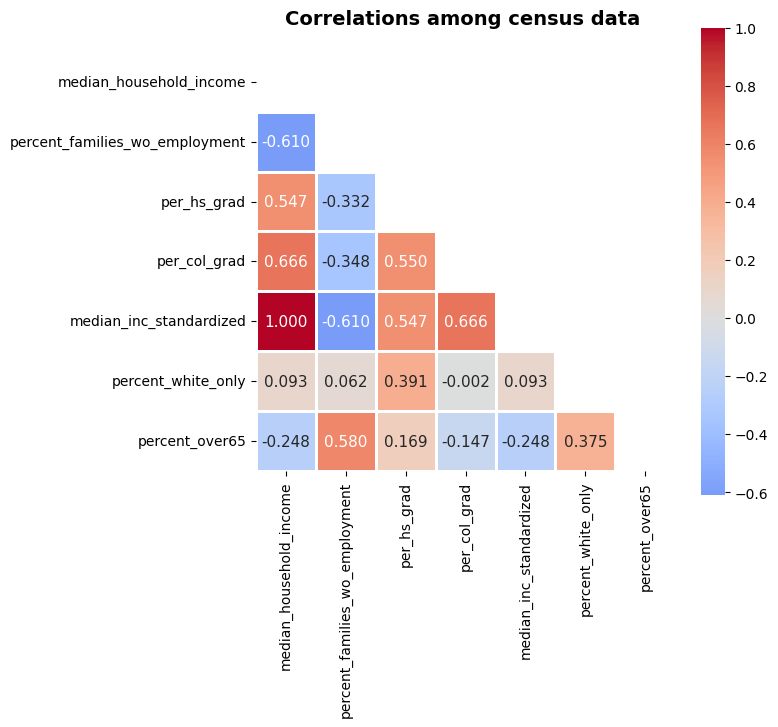

In [282]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(check_collinearity, dtype=bool), k=0)

sns.heatmap(check_collinearity, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among census data ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

**Why these confounders?**
+ Lower income drives higher food insecurity and poor health. Need to control for it or else the relationship between FI and health pravelance will be overstated.
+ Lower education correlates with lower income and higher FI rate.
+ High unemployment - driver of food insecurity

**Model Formuation**

Run seperate regression model for each health outcome:

+  Model 1: Diabetes Prevalence
$$\text{Diabetes Prevalence} = \beta_0 + \beta_1 \cdot \text{Avg Shortfall Per Capita} + \beta_2 \cdot \text{Median Income Statardized} + \beta_3 \cdot \text{Per Col Grad} + \beta_4 \cdot \text{Per Families W/O Employ}  + \beta_5 \cdot \text{Per Over $65$}  + \beta_6 \cdot \text{Per White Only} + \epsilon$$

+  Model 2: Obesity Prevalence
$$\text{Obesity Prevalence} = \beta_0 + \beta_1 \cdot \text{Avg Shortfall Per Capita} + \beta_2 \cdot \text{Median Income Statardized} + \beta_3 \cdot \text{Per Col Grad} + \beta_4 \cdot \text{Per Families W/O Employ} + + \beta_5 \cdot \text{Per Over $65$}  + \beta_6 \cdot \text{Per White Only}\epsilon$$

In [283]:
all_census['fips'] = all_census['fips'].astype(str).str.zfill(5)
#Merge the data
explanatory_analysis = county_avg_places.merge(
    all_census, 
    on='fips', 
    how='inner')

In [284]:
explanatory_analysis.head()

fips state_name   county_name_x  shortfall_avg_2010_2022  \
0  01001         al  autauga county             4.289209e+06   
1  01003         al  baldwin county             1.607862e+07   
2  01005         al  barbour county             3.052385e+06   
3  01007         al     bibb county             1.894395e+06   
4  01009         al   blount county             3.901295e+06   

   food_insecurity_rate_avg_2010_2022  cost_per_meal_avg_2010_2022  \
0                            0.139917                     3.162223   
1                            0.130538                     3.479203   
2                            0.216923                     3.095625   
3                            0.159615                     3.013433   
4                            0.128308                     2.997825   

   shortfall_per_capita_avg_2010_2022  num_food_insecure_avg_2010_2022  \
0                           77.117362                      7753.333333   
1                           78.953495                     26247.692308   
2                          115.660750                      5741.538462   
3                           83.837650                      3608.461538   
4                           67.466397                      7409.230769   

   child_fi_rate_avg_2010_2022  per_less_low_threshold_fi_avg_2010_2022  ...  \
0                     0.195583                                 0.446333  ...   
1                     0.190385                                 0.436385  ...   
2                     0.298154                                 0.571154  ...   
3                     0.235000                                 0.500538  ...   
4                     0.204154                                 0.533154  ...   

             county_name_y  estimate_total_households  \
0  Autauga County, Alabama                      22308   
1  Baldwin County, Alabama                      90802   
2  Barbour County, Alabama                       9016   
3     Bibb County, Alabama                       7216   
4   Blount County, Alabama                      21626   

   median_household_income  percent_families_wo_employment per_hs_grad  \
0                  68315.0                            17.9        90.4   
1                  71039.0                            20.3        91.6   
2                  39712.0                            26.2        76.5   
3                  50669.0                            22.5        78.9   
4                  57440.0                            20.1        81.8   

   per_col_grad  _merge  median_inc_standardized  percent_white_only  \
0          29.6    both                 0.336969                74.4   
1          32.6    both                 0.490256                84.0   
2          11.9    both                -1.272602                45.5   
3          10.9    both                -0.656021                75.8   
4          14.7    both                -0.274998                91.3   

   percent_over65  
0            15.6  
1            21.2  
2            19.8  
3            16.8  
4            18.3  

[5 rows x 24 columns]

In [285]:
nan_rows = explanatory_analysis.isnull().any(axis=1)

In [286]:
explanatory_analysis[nan_rows]

fips state_name  county_name_x  shortfall_avg_2010_2022  \
2675  48301         tx  loving county              8653.076923   

      food_insecurity_rate_avg_2010_2022  cost_per_meal_avg_2010_2022  \
2675                            0.180154                     3.066504   

      shortfall_per_capita_avg_2010_2022  num_food_insecure_avg_2010_2022  \
2675                           94.086923                        16.153846   

      child_fi_rate_avg_2010_2022  per_less_low_threshold_fi_avg_2010_2022  \
2675                     0.205455                                 0.588231   

      ...         county_name_y  estimate_total_households  \
2675  ...  Loving County, Texas                         40   

      median_household_income  percent_families_wo_employment per_hs_grad  \
2675                      NaN                             0.0        96.8   

      per_col_grad  _merge  median_inc_standardized  percent_white_only  \
2675           0.0    both                      NaN                94.8   

      percent_over65  
2675            35.4  

[1 rows x 24 columns]

In [287]:
test_columns_2 = ['median_household_income','percent_families_wo_employment', 'per_hs_grad', 'per_col_grad', 'median_inc_standardized','shortfall_avg_2010_2022','shortfall_per_capita_avg_2010_2022','percent_white_only','percent_over65']
check_coli_2 = explanatory_analysis[test_columns_2].corr()

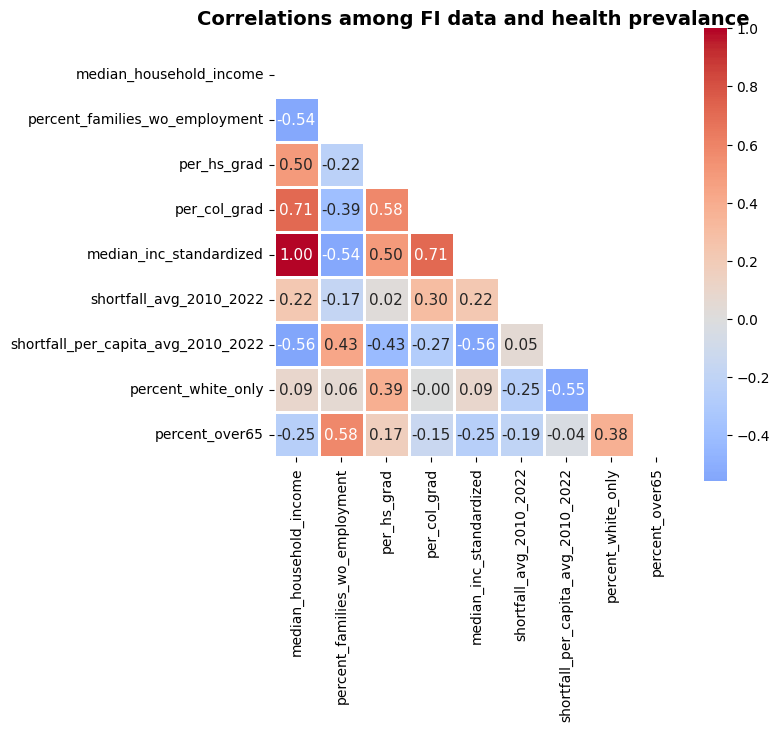

In [288]:
#Draw heatmap 
plt.figure(figsize=(8,8))

#hide the upper triangle 
mask = np.triu(np.ones_like(check_coli_2, dtype=bool), k=0)

sns.heatmap(check_coli_2, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask = mask, annot_kws={'size': 11})

plt.title('Correlations among FI data and health prevalance ', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

In [289]:
import statsmodels.api as sm

In [290]:
#Run OLS 
def run_explanatory_ols(data, y_var):
    
    ## Define independent varibles X
    X_vars = ['shortfall_per_capita_avg_2010_2022','median_inc_standardized','percent_families_wo_employment','per_col_grad','percent_white_only','percent_over65']
    X = explanatory_analysis[X_vars]
    X = sm.add_constant(X)
    
    ## Define dependent varibles Y
    y = explanatory_analysis[y_var] 
    
    ## Fit the OLS model
    model = sm.OLS(y, X, missing='drop').fit()

    return model

In [291]:
## Diabetes model 
diabetes_results = run_explanatory_ols(explanatory_analysis, 'diabetes_prevalence')
print(diabetes_results.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.725
Model:                             OLS   Adj. R-squared:                  0.724
Method:                  Least Squares   F-statistic:                     1376.
Date:                 Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                         19:45:57   Log-Likelihood:                 9412.8
No. Observations:                 3143   AIC:                        -1.881e+04
Df Residuals:                     3136   BIC:                        -1.877e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**Observations - Need to fix this since now add more confounding variables**
+ Shortfall Per Capita - $+0.00004382$ - higher shortfall per person is independently associated with a higher diabetes prevalence.
+ Median Inc Standardized $-0.0076$ - standardiviation increase in median household income is associated with a 0.0036 decrease in diabetes prevalence.
+ Per College Grad $-0.0006$ - higher college graduation rate is independently associated with a lower diabetes prevalance.
+ Families W/O Employment $0.0006$ (before this was $-0.0006$) - increase in the percatnage of families w/o employment is associated with higher diabetes prevalance.
+ Per White Only $-0.0006$ - higher percentage of white residents strongly predicts lower diabetes prevalence.
+ Percent Over 65 $-0.0013$ - higher percentage of 65+ residents strongly predicts lower diabetes prevalence.
  
**Possible explanation**
+ Before: Families W/O Employment is acting as a proxy for an unobserved factor (Age, Urbbanization. Take us back to the conversation of economic hardship - where we have different access to healthcare).
+ After: The 65+ population variable is acting as a proxy for an unobserved protective factor. Wealthier poeple over 65 migrate to richer counties for better healthcare so overall better health outcomes. 

In [292]:
##Check Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
concern_vars = ['shortfall_per_capita_avg_2010_2022','median_inc_standardized','percent_families_wo_employment','per_col_grad','percent_white_only','percent_over65']
X = explanatory_analysis[concern_vars].assign(const=1).dropna()
vif_df = pd.DataFrame({
    "variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_df)

                             variable         VIF
0  shortfall_per_capita_avg_2010_2022    2.795255
1             median_inc_standardized    3.254553
2      percent_families_wo_employment    2.461293
3                        per_col_grad    2.203127
4                  percent_white_only    1.846632
5                      percent_over65    1.949423
6                               const  118.179990


All predictors are < 5 so generally we could trust the model from the multicollinearity standpoint. Hopefully sensitivity analysis later won’t blow up due to collinearity. 

In [293]:
## Obesity model 
obesity_results = run_explanatory_ols(explanatory_analysis, 'obesity_prevalence')
print(obesity_results.summary())

                            OLS Regression Results                            
Dep. Variable:     obesity_prevalence   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     607.0
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:46:00   Log-Likelihood:                 6397.7
No. Observations:                3143   AIC:                        -1.278e+04
Df Residuals:                    3136   BIC:                        -1.274e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Insert observations here**
+ Shortfall Per Capita - $–0.0004$ - higher shortfall is correlated with lower diabetes prevalence.
+ Median Inc Standardized $–0.0199$ - standardiviation increase in median household income is associated with a 0.0199 decrease in diabetes prevalence.
+ Per College Grad $-0.0020$ - higher college graduation rate is independently associated with a lower diabetes prevalance.
+ Families W/O Employment $0.0002$ - yet p = 0.097 (not significant). 
+ Per White Only $-0.0006$ - higher percentage of white residents strongly predicts lower obesity prevalence.
+ Percent Over 65 $-0.0013$ - higher percentage of 65+ residents correlated with obesity prevalence.

## Sensitivity analysis

Propose to exclude 2 variables - $\text{percent\_families\_wo\_employment}$

In [294]:
def run_sensitivity_ols(data, y_var):
    ## Reduce the x vars 
    X_vars_sensitive = [
        'shortfall_per_capita_avg_2010_2022', 
        'median_inc_standardized', 
        'per_col_grad',
        'percent_over65', 
        'percent_white_only'   
    ]
    y = data[y_var]
    X_sensitive = data[X_vars_sensitive]
    X_sensitive = sm.add_constant(X_sensitive)
    ## Fit the OLS model
    model = sm.OLS(y, X_sensitive, missing='drop').fit()
    
    return model

In [295]:
## Diabetes sensitivity model
diabetes_sensitivity_results = run_sensitivity_ols(explanatory_analysis, 'diabetes_prevalence')
print(diabetes_sensitivity_results.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.714
Model:                             OLS   Adj. R-squared:                  0.713
Method:                  Least Squares   F-statistic:                     1563.
Date:                 Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                         19:46:08   Log-Likelihood:                 9350.6
No. Observations:                 3143   AIC:                        -1.869e+04
Df Residuals:                     3137   BIC:                        -1.865e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**Some observations** 
+ R-squared: $0.714$. Although it is lower than previous model ($R^2=0.725$),  $71.4\%$ of the variance is still explained by this core set of variables. 
+ The Shortfall Per Capita variable remains significance. This strongly confirms that chronic economic food stress has an independent, positive relationship with diabetes prevalence, even after controlling for income, age, and education.
+ Percent Over 65 - negative coefficient remains, which confirming likelihood of confounding.

In [297]:
## Obesity sensitivity model
obesity_sensitivity_results = run_sensitivity_ols(explanatory_analysis, 'obesity_prevalence')
print(obesity_sensitivity_results.summary())

                            OLS Regression Results                            
Dep. Variable:     obesity_prevalence   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     727.4
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:04:14   Log-Likelihood:                 6396.3
No. Observations:                3143   AIC:                        -1.278e+04
Df Residuals:                    3137   BIC:                        -1.274e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Observation**
+ The Shortfall Per Capita is no longer statistically significant (very close to zero). Instead the social factors like Median Income Standardzied and Per Col Grad, Percent Individuals Over 65 become the strong indicators of obesity prevalence.
+ It's not the unique shortfall of the food budget that matters the most but the overall lack of economic resources and education that drives the outcome.

## Visualization 

In [300]:
import plotly.express as px

In [301]:
def create_county_choropleth(df, color_column, title):
    fig = px.choropleth(
        df, 
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations='fips', 
        color=color_column, 
        color_continuous_scale="Reds", 
        range_color=(df[color_column].min(), df[color_column].max()),
        scope="usa",
        hover_name='county_name', # Show county name on hover
        hover_data={
            'fips': True, 
            color_column: ':.2%', # prevalence as a percentage
            'shortfall_per_capita_avg_2010_2022': ':.0f' # shortfall
        },
        title=title,
        height=600
    )
    
    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        coloraxis_colorbar=dict(title=color_column.replace('_', ' ').title())
    )
    fig.show()

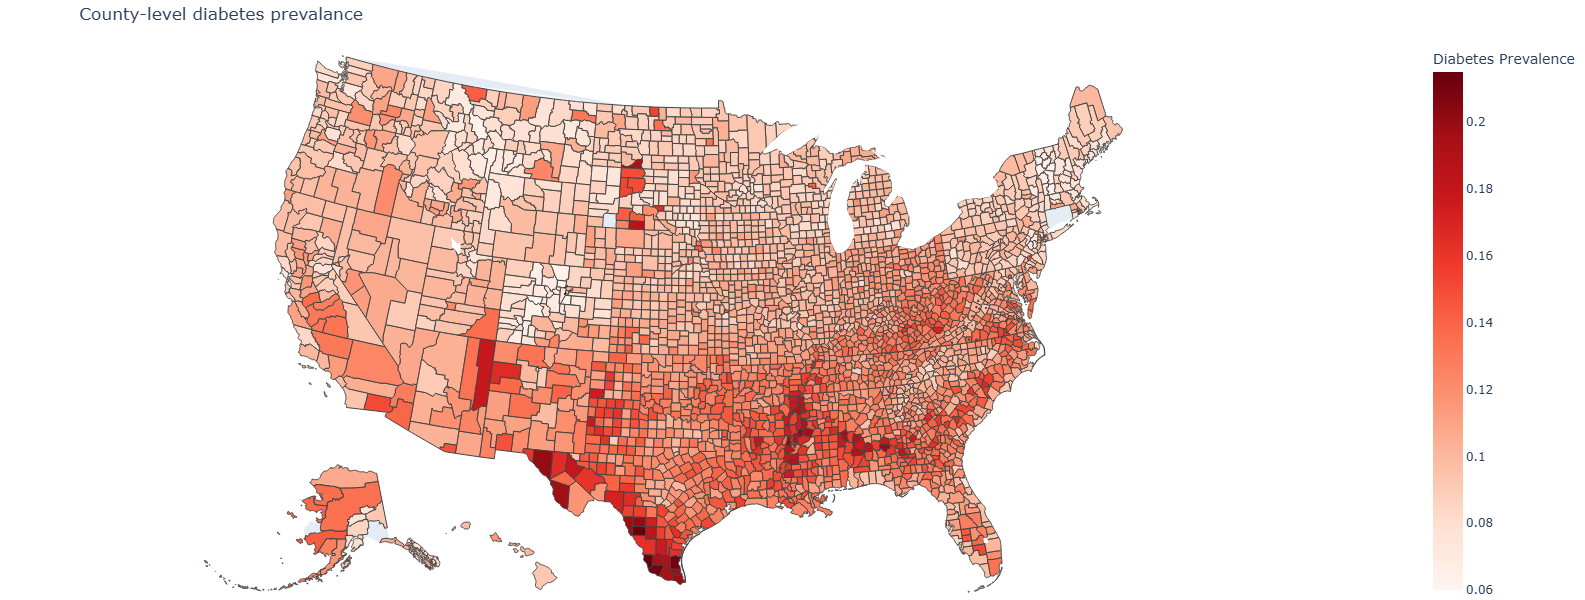

In [302]:
create_county_choropleth(
    county_avg_places, 
    'diabetes_prevalence', 
    'County-level diabetes prevalance'
)

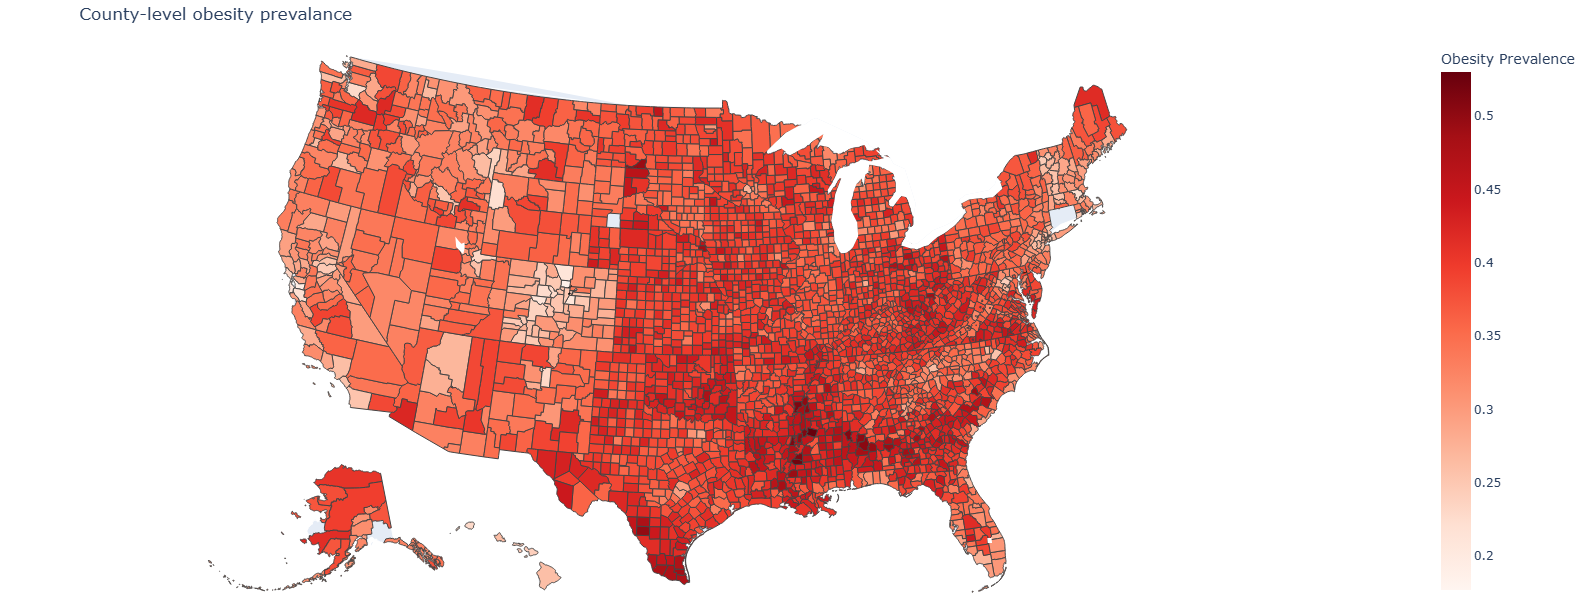

In [303]:
create_county_choropleth(
    county_avg_places, 
    'obesity_prevalence', 
    'County-level obesity prevalance'
)

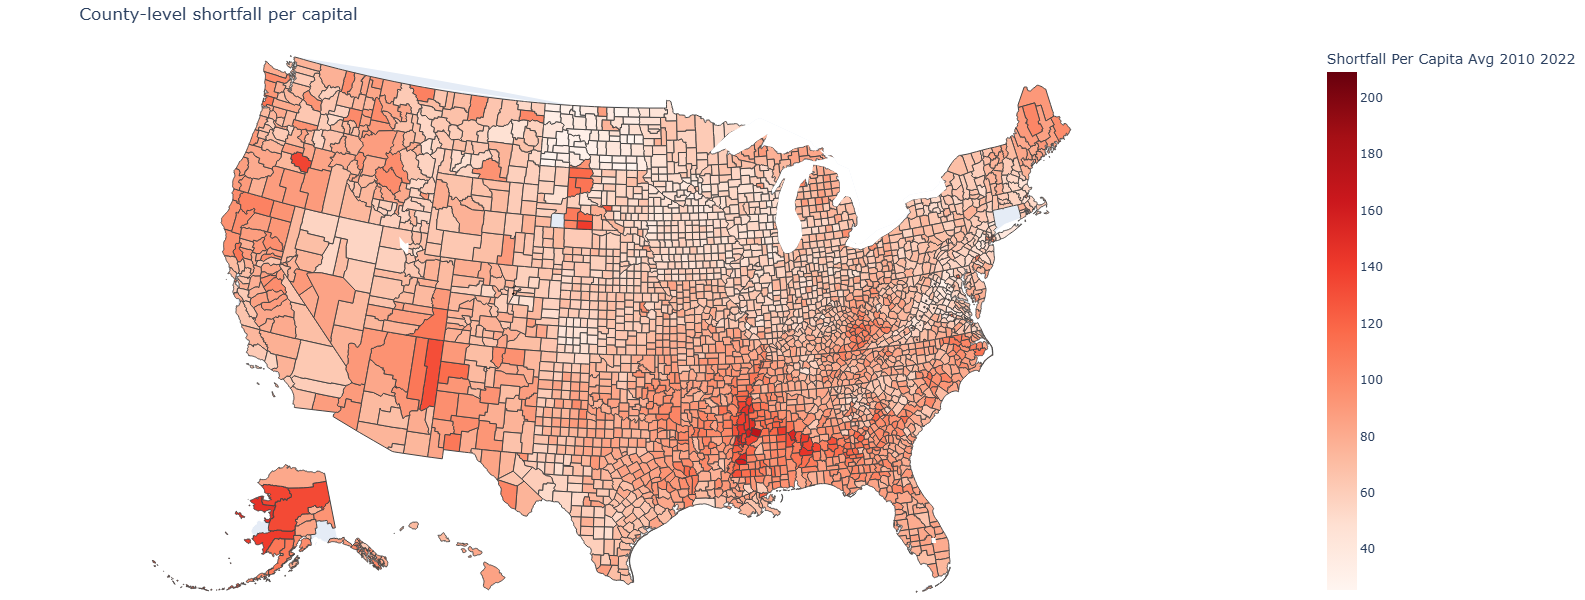

In [304]:
create_county_choropleth(
    county_avg_places, 
    'shortfall_per_capita_avg_2010_2022', 
    'County-level shortfall per capital'
)

In [305]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [306]:
plot_data = explo_analysis[[
    'median_inc_standardized', 
    'per_col_grad', 
    'diabetes_prevalence'
]].dropna()

In [307]:
#Define the variables 
X = plot_data['median_inc_standardized']
Y = plot_data['per_col_grad']
Z = plot_data['diabetes_prevalence']

In [308]:
# Grid of points to interpolate the data
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
XI, YI = np.meshgrid(xi, yi)
#Interpolate 
ZI = griddata((X, Y), Z, (XI, YI), method='cubic')

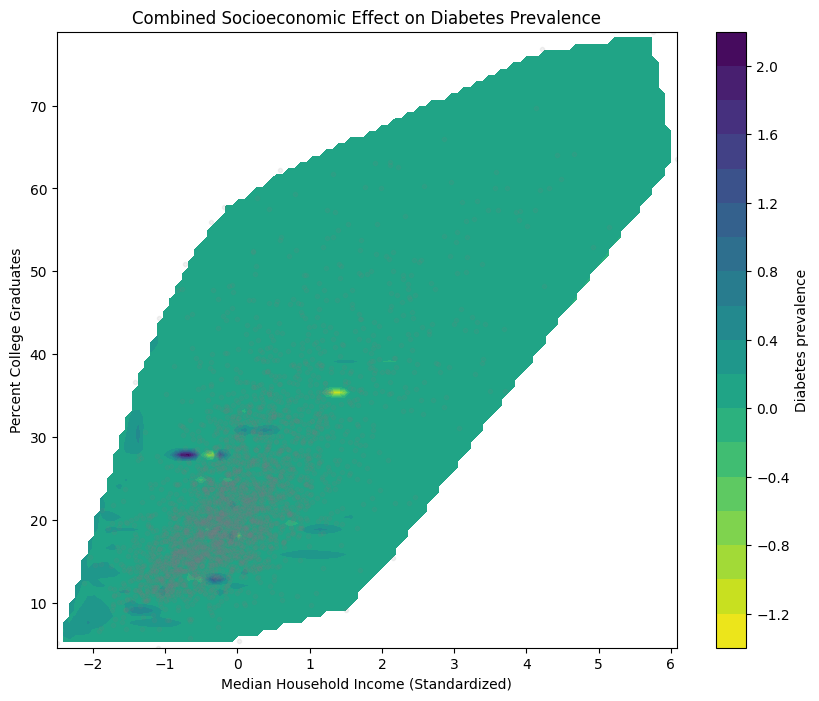

In [309]:
#Create plot 
plt.figure(figsize=(10, 8))
CS = plt.contourf(XI, YI, ZI, levels=20, cmap='viridis_r') 
plt.colorbar(CS, label='Diabetes prevalence')
plt.scatter(X, Y, marker='.', c='gray', alpha=0.1) # Show original data points for context

plt.xlabel('Median Household Income (Standardized)')
plt.ylabel('Percent College Graduates')
plt.title('Combined Socioeconomic Effect on Diabetes Prevalence')
plt.show()